# Ford Go Bike 2017-2019
## by Marcello Victorino
*03/06/2019*

## Dataset Introduction and Prior Wrangling


# TODO
> Brief dataset introduction and wrnagling performed.
A little more detailed than the README file

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load the data
df = pd.read_csv('Clean_FordGoBike_2017_2019.csv')
df.head()

,bike_id,end_station_id,end_station_latitude,end_station_longitude,start_station_id,start_station_latitude,start_station_longitude,start_time,low_income_trip,subscriber,gender,duration_min,user_age,year,month,week,day,weekday,hour
0,96,43,37.778768,-122.415929,74,37.776435,-122.426244,2017-12-31 16:57:39.654,0,0,1,1335.2,31,2017,12,52,31,6,16
1,88,96,37.766210,-122.426614,284,37.784872,-122.400876,2017-12-31 15:56:34.842,0,0,0,1313.3,53,2017,12,52,31,6,15
2,3167,247,37.867789,-122.265896,239,37.868813,-122.258764,2017-12-31 14:23:14.001,0,1,0,726.7,21,2017,12,52,31,6,14
3,3539,259,37.866249,-122.299371,259,37.866249,-122.299371,2017-12-31 23:49:28.422,0,0,0,75.1,27,2017,12,52,31,6,23
4,2311,24,37.789677,-122.390428,67,37.776639,-122.395526,2017-12-31 23:52:55.581,0,1,1,36.4,28,2017,12,52,31,6,23


Since the data has already been wrangled, we can now start working on the Exploratory Data Analysis, tackling it in a procedural manner:
1. **Dataset Structure**: Integrity Check, no missing data, no duplicates, appropriate data types etc.
2. **Univariate Analysis**: investigate each variable distribution, flagging possible outliers and/or need for transformations
3. **Correlation Matrix**: identify pair of variables highly correlated ($Pearson's R \geq 0.70$)
4. **Bivariate Analysis**: investigate pair-wise relationship among variables to identify interesting - and possibly not so obvious - patterns
5. **Multivariate Analysis**: investigate pair-wise relationship against one (or more) main variable of interest

Once completed, we should be able to uncover some interesting insights worth sharing with others.

This process requires some final polishing to make sure our visualization has the appropriate encodings and convey the message we want to communicate.

## Dataset Structure

In [3]:
df.shape

(3023992, 19)

The dataset contains over 3 million rows and 19 columns, of which: 
+ 8 are numerical
+ 3 are string/nominal
+ 4 are positional (lat/long)
+ 3 are categorical (binary)
+ 1 is datetime

In [4]:
# Strings
to_string = ['bike_id', 'end_station_id', 'start_station_id']
for col in to_string:
    df[f'{col}'] = df[f'{col}'].astype(str)

# Date-time
df.start_time = pd.to_datetime(df.start_time)

For efficiency purpose, since we are only working with small numbers, let's also transform the numerical variables into their lighter version:

In [5]:
# Float 32
to_float32 = ['end_station_latitude', 'end_station_longitude', 'start_station_latitude', 'start_station_longitude', 'duration_min']
for col in to_float32:
    df[f'{col}'] = df[f'{col}'].astype(np.float32)
    
# Integer32
to_int = ['low_income_trip', 'subscriber', 'gender', 'user_age', 'year', 'month', 'week', 'day', 'weekday', 'hour']
for col in to_int:
    df[f'{col}'] = df[f'{col}'].astype(np.int32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023992 entries, 0 to 3023991
Data columns (total 19 columns):
bike_id                    object
end_station_id             object
end_station_latitude       float32
end_station_longitude      float32
start_station_id           object
start_station_latitude     float32
start_station_longitude    float32
start_time                 datetime64[ns]
low_income_trip            int32
subscriber                 int32
gender                     int32
duration_min               float32
user_age                   int32
year                       int32
month                      int32
week                       int32
day                        int32
weekday                    int32
hour                       int32
dtypes: datetime64[ns](1), float32(5), int32(10), object(3)
memory usage: 265.3+ MB


In [7]:
df.isnull().sum()

bike_id                    0
end_station_id             0
end_station_latitude       0
end_station_longitude      0
start_station_id           0
start_station_latitude     0
start_station_longitude    0
start_time                 0
low_income_trip            0
subscriber                 0
gender                     0
duration_min               0
user_age                   0
year                       0
month                      0
week                       0
day                        0
weekday                    0
hour                       0
dtype: int64

In [8]:
df.duplicated().sum()

0

There are no duplicates or missing values.

Let's perform some sanity check on the values:

In [9]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,end_station_latitude,end_station_longitude,start_station_latitude,start_station_longitude,low_income_trip,subscriber,gender,duration_min,user_age,year,month,week,day,weekday,hour
count,"3,023,992.00","3,023,992.00","3,023,992.00","3,023,992.00","3,023,992.00","3,023,992.00","3,023,992.00","3,023,992.00","3,023,992.00","3,023,992.00","3,023,992.00","3,023,992.00","3,023,992.00","3,023,992.00","3,023,992.00"
mean,37.77,-122.35,37.77,-122.35,0.08,0.89,0.74,12.91,35.00,"2,018.12",6.20,25.18,15.77,2.58,13.50
std,0.13,0.32,0.10,0.14,0.27,0.32,0.44,33.18,10.38,0.64,3.48,15.03,8.76,1.82,4.75
min,0.00,-122.47,0.00,-122.47,0.00,0.00,0.00,1.00,18.00,"2,017.00",1.00,1.00,1.00,0.00,0.00
25%,37.77,-122.41,37.77,-122.41,0.00,1.00,0.00,5.70,28.00,"2,018.00",3.00,12.00,8.00,1.00,9.00
50%,37.78,-122.40,37.78,-122.40,0.00,1.00,1.00,9.00,33.00,"2,018.00",6.00,25.00,16.00,2.00,14.00
75%,37.80,-122.29,37.80,-122.29,0.00,1.00,1.00,13.90,40.00,"2,019.00",9.00,39.00,23.00,4.00,17.00
max,37.88,0.00,37.88,0.00,1.00,1.00,1.00,"1,438.00",141.00,"2,019.00",12.00,52.00,31.00,6.00,23.00


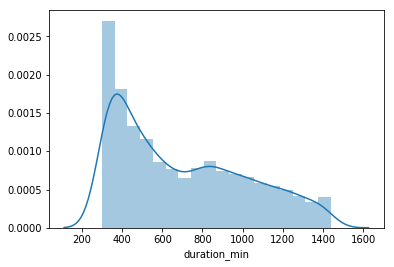

In [10]:
a = df.query('duration_min > 300').duration_min#.plot(kind='hist');
sns.distplot(a);

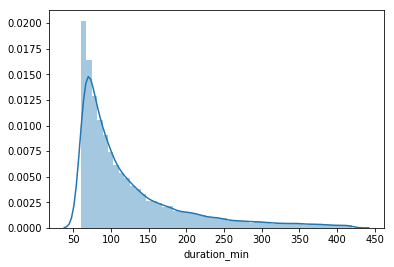

In [11]:
sns.distplot(df.query('duration_min >60 & duration_min<420').duration_min);

Looks like latitude and longitude of both start and end stations have the weird value of 0.
Let's further investigate this:

In [12]:
# station id 420 does not have the correct lat,long coordinates. But not necessary to remove these observations.
df.query('end_station_latitude <= 30') 
df.query('end_station_id == "420"')

,bike_id,end_station_id,end_station_latitude,end_station_longitude,start_station_id,start_station_latitude,start_station_longitude,start_time,low_income_trip,subscriber,gender,duration_min,user_age,year,month,week,day,weekday,hour
2797266,1612,420,0.00,0.00,50,37.78,-122.39,2019-04-30 18:21:42.610,0,1,0,39.40,24,2019,4,18,30,1,18
2798005,3507,420,0.00,0.00,98,37.77,-122.42,2019-04-30 17:31:19.646,0,1,0,32.70,38,2019,4,18,30,1,17
2798157,1142,420,0.00,0.00,370,37.79,-122.41,2019-04-30 17:45:38.452,1,1,0,9.10,28,2019,4,18,30,1,17
2798231,3500,420,0.00,0.00,21,37.79,-122.40,2019-04-30 17:39:33.507,0,1,1,10.50,28,2019,4,18,30,1,17
2798667,1181,420,0.00,0.00,11,37.80,-122.40,2019-04-30 17:17:10.486,0,1,1,7.20,24,2019,4,18,30,1,17
2798746,2535,420,0.00,0.00,81,37.78,-122.39,2019-04-30 16:58:41.209,0,1,1,20.60,49,2019,4,18,30,1,16
2798777,462,420,0.00,0.00,80,37.78,-122.40,2019-04-30 16:55:35.924,0,1,1,21.80,27,2019,4,18,30,1,16
2799055,1880,420,0.00,0.00,16,37.79,-122.39,2019-04-30 16:44:12.351,0,0,1,12.70,43,2019,4,18,30,1,16
2810858,150,420,0.00,0.00,377,37.77,-122.45,2019-04-28 18:40:41.288,0,0,1,24.80,38,2019,4,17,28,6,18
2810910,311,420,0.00,0.00,139,37.75,-122.41,2019-04-28 18:40:08.324,0,1,0,11.30,38,2019,4,17,28,6,18


We can see that station ID 420 does not have the correct lat, long coordinates in the system. In this case, it is not necessary to remove these observations, just wont be able to plot them as a graph/network.

Finally, let's use the datetime variable as the index, allowing us to make use of the powerful time-series functions provided by Pandas:

In [13]:
df.set_index(df.start_time, inplace=True)

In [14]:
df.sort_index(inplace=True)
df.head()

,bike_id,end_station_id,end_station_latitude,end_station_longitude,start_station_id,start_station_latitude,start_station_longitude,start_time,low_income_trip,subscriber,gender,duration_min,user_age,year,month,week,day,weekday,hour
start_time,,,,,,,,,,,,,,,,,,,
2017-06-28 09:47:36.347,240,48,37.78,-122.39,21,37.79,-122.40,2017-06-28 09:47:36.347,0,1,0,7.10,32,2017,6,26,28,2,9
2017-06-28 09:47:41.664,669,59,37.77,-122.42,58,37.78,-122.42,2017-06-28 09:47:41.664,0,1,1,6.10,36,2017,6,26,28,2,9
2017-06-28 09:49:46.377,117,48,37.78,-122.39,25,37.79,-122.40,2017-06-28 09:49:46.377,0,1,1,3.10,33,2017,6,26,28,2,9
2017-06-28 09:50:59.175,77,9,37.80,-122.40,81,37.78,-122.39,2017-06-28 09:50:59.175,0,1,1,20.00,32,2017,6,26,28,2,9
2017-06-28 09:56:39.631,316,321,37.78,-122.40,66,37.78,-122.39,2017-06-28 09:56:39.631,0,1,1,7.20,44,2017,6,26,28,2,9


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [58]:
def proportion_categorical(variable):
    g = df[f'{variable}'].value_counts(normalize=True)
    sns.barplot(x=g.keys(), y=g.values)
    plt.title(f'Proportion of {variable}')
    plt.ylabel('proportion [%]');

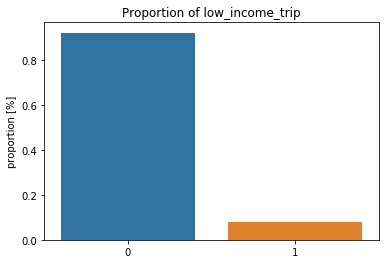

In [61]:
proportion_categorical('low_income_trip')

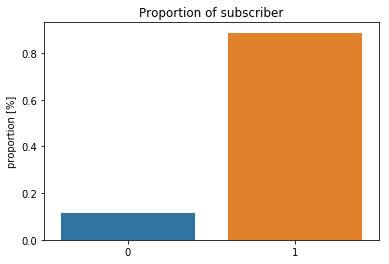

In [59]:
proportion_categorical('subscriber')

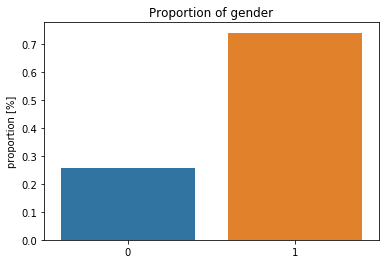

In [60]:
proportion_categorical('gender')

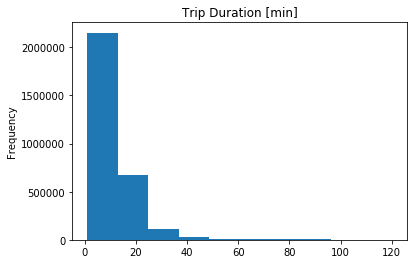

In [81]:
df.query('duration_min <= 120').duration_min.plot(kind='hist', title='Trip Duration [min]');

The trip distribution (in minutes) is highly skewed to the right, even after filtering out trips taking longer than 2 hours.

Let's transform it into the log10 scale:

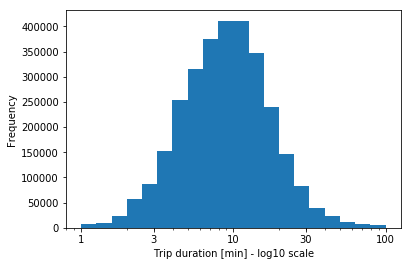

In [102]:
log_bins = 10 ** np.arange(0, 2+0.1, 0.1)

df.query('duration_min <= 120').duration_min.plot(kind='hist', bins=log_bins);
plt.xscale('log')
log_ticks = [1, 3, 10, 30, 100]
plt.xticks(log_ticks, log_ticks)
plt.xlabel('Trip duration [min] - log10 scale');

In [110]:
df.duration_min.describe()
df.duration_min.quantile(0.95)

27.399999618530273

After transforming the trip duration (min) into the log10 scale, the values present a normal-like distribution. 

95% of trips last less than 30 minutes.

In [113]:
df.user_age.describe()

count   3,023,992.00
mean           35.00
std            10.38
min            18.00
25%            28.00
50%            33.00
75%            40.00
max           141.00
Name: user_age, dtype: float64

Further investigate age, since too high value seems to be wrong entry.

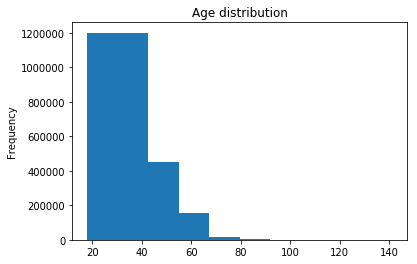

In [112]:
df.user_age.plot(kind='hist', title='Age distribution');

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!